# BERT Model
### Reference 
tutorial on ktrain: https://github.com/amaiya/ktrain
Finetune tutorial: https://towardsdatascience.com/ktrain-a-lightweight-wrapper-for-keras-to-help-train-neural-networks-82851ba889c

In [ ]:
# fine tune the pre trained bert 
# bidirectional - take content before and after 

### Mount to Google Drive 

In [ ]:
##connecting gdrive into the google colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Import Libraries

In [ ]:
!pip install ktrain

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import ktrain
from ktrain import text
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


### Read Dataset

In [ ]:
# change file path 
data=pd.read_csv("/content/gdrive/MyDrive/Depression Project/DepressionDataFinal2Processed.csv")
data = data.astype(str)
data.head()

,Id,Text,Target
0,2.85e+17,one thing love life mother one ever come mine,1
1,2.9e+17,want perfect want happy,0
2,2.86e+17,mom hates dad hates today sucks fword life tho,0
3,2.86e+17,hate hate life,0
4,2.86e+17,feel good,1


In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(data, data.Target, test_size=0.2, random_state=1)

### Split dataset into Train and Test set & Pre-process 

In [ ]:
(x_train, y_train), (x_test, y_test), preprocess = text.texts_from_df(train_df = data, text_column = "Text", label_columns = "Target", 
                      val_df = data, maxlen = 20, preprocess_mode = "bert")

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [ ]:
x_train[0].shape

(8815, 20)

### Load Pre-trained BERT Model

In [ ]:
model = text.text_classifier(name='bert', 
                             train_data=(x_train, y_train),
                             preproc = preprocess)

Is Multi-Label? False
maxlen is 20
done.


In [ ]:
# get learning rate - find optimal learning rate 
# if maxlen = 500, batch size = 6
learner = ktrain.get_learner(model = model, 
                             train_data=(x_train, y_train),
                             val_data = (x_test, y_test),
                             batch_size=100
                             )

### Finetune and Train Model

In [ ]:
# # takes time 
# learner.lr_find()
# learner.lr_plot()

In [ ]:
learner.fit_onecycle(lr = 1e-5, epochs = 50)



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/50
89/89 [==============================] - 141s 1s/step - loss: 0.6457 - accuracy: 0.6314 - val_loss: 0.4682 - val_accuracy: 0.8233
Epoch 2/50
89/89 [==============================] - 113s 1s/step - loss: 0.4183 - accuracy: 0.8553 - val_loss: 0.2581 - val_accuracy: 0.9090
Epoch 3/50
89/89 [==============================] - 113s 1s/step - loss: 0.2627 - accuracy: 0.9027 - val_loss: 0.1857 - val_accuracy: 0.9333
Epoch 4/50
89/89 [==============================] - 113s 1s/step - loss: 0.1894 - accuracy: 0.9333 - val_loss: 0.1473 - val_accuracy: 0.9513
Epoch 5/50
89/89 [==============================] - 113s 1s/step - loss: 0.1619 - accuracy: 0.9414 - val_loss: 0.1220 - val_accuracy: 0.9594
Epoch 6/50
89/89 [==============================] - 113s 1s/step - loss: 0.1336 - accuracy: 0.9524 - val_loss: 0.1046 - val_accuracy: 0.9654
Epoch 7/50
89/89 [==============================] - 113s 1s/step - loss: 0.1202 - accuracy:

### Evaluate Model 

In [ ]:
predictor = ktrain.get_predictor(learner.model, preprocess)

In [ ]:
data.shape

(8815, 3)

In [ ]:
learner.validate()

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4105
           1       0.99      0.99      0.99      4710

    accuracy                           0.99      8815
   macro avg       0.99      0.99      0.99      8815
weighted avg       0.99      0.99      0.99      8815



array([[4053,   52],
       [  49, 4661]])

### Confusion Matrix

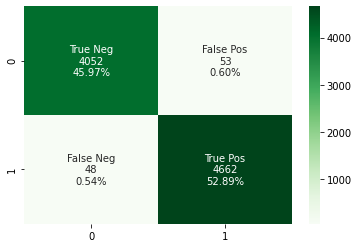

In [ ]:
cm = np.array([[4052,  53],[48,  4662]])

import seaborn as sns
import matplotlib.pyplot as plt     

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Greens')

### Misclassfied Tweets


In [ ]:
from numpy import nan
text = data['Text'].values.tolist()
target = data["Target"].values.tolist()
print(target)
print (text)

['1', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1',

In [ ]:
pred = predictor.predict(text)

In [ ]:
x = 0
for i in range(8815):
  if target[i] != pred[i]:
    x = x+1
    print("Text: ",text[i], "-->", "Actual Label: ", target[i], "-->", "Predicted: ", pred[i])
print(x)

Text:  feel good --> Actual Label:  1 --> Predicted:  0
Text:  damn feel good --> Actual Label:  0 --> Predicted:  1
Text:  want --> Actual Label:  0 --> Predicted:  1
Text:  need --> Actual Label:  1 --> Predicted:  0
Text:  feel good --> Actual Label:  1 --> Predicted:  0
Text:  need --> Actual Label:  1 --> Predicted:  0
Text:  good life --> Actual Label:  1 --> Predicted:  0
Text:  feel good --> Actual Label:  1 --> Predicted:  0
Text:  want --> Actual Label:  0 --> Predicted:  1
Text:  feel good --> Actual Label:  1 --> Predicted:  0
Text:  feel good --> Actual Label:  1 --> Predicted:  0
Text:  feel good --> Actual Label:  1 --> Predicted:  0
Text:  feel good --> Actual Label:  1 --> Predicted:  0
Text:  want --> Actual Label:  0 --> Predicted:  1
Text:  happy --> Actual Label:  0 --> Predicted:  1
Text:  nan --> Actual Label:  0 --> Predicted:  1
Text:  nan --> Actual Label:  0 --> Predicted:  1
Text:  good --> Actual Label:  0 --> Predicted:  1
Text:  i good --> Actual Label:  

### Example Tweets 

In [ ]:
# 1 - non-depressed
# 0 - depressed 
non_depressed_tweet_exmp = ['i am the happiest person in this world', 
            'i am excited',
            'i would not change the past if i could', 
           'i get everything i want', 
           'everyday of my life is a celebration', 
           'my life is blessed', 
           'i feel complete', 
           'thank you god',
           'i love my family', 
           'in a great mood today', 
           'i never feel sad', 
           'i hate chocolate']

depressed_tweet_exmp = ['i lost in life',
          'why do i have to be sad',
          'i have never been so disappointed in life',
           'i feel like crying', 
           'i hate the world', 
           'why is everything so hard', 
           'i feel miserable', 
           'i live in a terrible place', 
           'i cry all day', 
           'i am not lucky nor blessed',
           'nobody loves me', 
           'i am unlucky' 
           ]

In [ ]:
predictor.predict(non_depressed_tweet_exmp)

['1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0']

In [ ]:
predictor.predict(depressed_tweet_exmp)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0']

In [ ]:
predictor.save('/content/gdrive/MyDrive/Depression Project/BERT')

### Test the model on a different Test Dataset 

In [ ]:
# change file path 
data2=pd.read_csv("/content/gdrive/MyDrive/Depression Project/Test_Dataset.csv")
data2= data2.astype(str)
data2.head()

,Id,Text,Target
0,2.9e+17,social life,0
1,2.9e+17,good friends,1
2,2.85e+17,listening love cause hate life,0
3,2.9e+17,love never gets bored,1
4,2.9e+17,best boyfriend ever,1


In [ ]:
from numpy import nan
text2 = data2['Text'].values.tolist()
target2 = data2["Target"].values.tolist()
print(target2)
print (text2)

['0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0',

In [ ]:
data2.shape

(1763, 3)

In [ ]:
data2.head()

,Id,Text,Target
0,2.9e+17,social life,0
1,2.9e+17,good friends,1
2,2.85e+17,listening love cause hate life,0
3,2.9e+17,love never gets bored,1
4,2.9e+17,best boyfriend ever,1


In [ ]:
pred2 = predictor.predict(text2)

In [ ]:
x = 0
for i in range(1763):
  if target2[i] == "0" and pred2[i] =="0":
    x = x+1
    print("Text: ",text2[i], "-->", "Actual Label: ", target2[i], "-->", "Predicted: ", pred2[i])
print(x)

Text:  social life --> Actual Label:  0 --> Predicted:  0
Text:  listening love cause hate life --> Actual Label:  0 --> Predicted:  0
Text:  wow suck --> Actual Label:  0 --> Predicted:  0
Text:  life series unfounate fworded events --> Actual Label:  0 --> Predicted:  0
Text:  yes i sad --> Actual Label:  0 --> Predicted:  0
Text:  i made like worst mistakes ever --> Actual Label:  0 --> Predicted:  0
Text:  fword life --> Actual Label:  0 --> Predicted:  0
Text:  new resolution drink life fword terrible --> Actual Label:  0 --> Predicted:  0
Text:  fword sword fword life hate fword dad fword --> Actual Label:  0 --> Predicted:  0
Text:  want alone miserable life u wanna make fun i fully aware existence --> Actual Label:  0 --> Predicted:  0
Text:  stressed could --> Actual Label:  0 --> Predicted:  0
Text:  i really unhappy try --> Actual Label:  0 --> Predicted:  0
Text:  i never sick life --> Actual Label:  0 --> Predicted:  0
Text:  hate feel alone --> Actual Label:  0 --> Predic

In [ ]:
x = 0
for i in range(1763):
  if target2[i] == "1" and pred2[i] =="1":
    x = x+1
    print("Text: ",text2[i], "-->", "Actual Label: ", target2[i], "-->", "Predicted: ", pred2[i])
print(x)

Text:  good friends --> Actual Label:  1 --> Predicted:  1
Text:  love never gets bored --> Actual Label:  1 --> Predicted:  1
Text:  best boyfriend ever --> Actual Label:  1 --> Predicted:  1
Text:  god bless --> Actual Label:  1 --> Predicted:  1
Text:  i ame life i loving every single moment --> Actual Label:  1 --> Predicted:  1
Text:  i feeling great --> Actual Label:  1 --> Predicted:  1
Text:  love life --> Actual Label:  1 --> Predicted:  1
Text:  love looking --> Actual Label:  1 --> Predicted:  1
Text:  feel like proud parent --> Actual Label:  1 --> Predicted:  1
Text:  introve love --> Actual Label:  1 --> Predicted:  1
Text:  goals life --> Actual Label:  1 --> Predicted:  1
Text:  i never many emotional days life good --> Actual Label:  1 --> Predicted:  1
Text:  little bit still love life --> Actual Label:  1 --> Predicted:  1
Text:  good thanks asking --> Actual Label:  1 --> Predicted:  1
Text:  want --> Actual Label:  1 --> Predicted:  1
Text:  may get want get need i

In [ ]:
x = 0
for i in range(1763):
  if target2[i] == "0" and pred2[i] =="1":
    x = x+1
    print("Text: ",text2[i], "-->", "Actual Label: ", target2[i], "-->", "Predicted: ", pred2[i])
print(x)

Text:  i love --> Actual Label:  0 --> Predicted:  1
Text:  i good --> Actual Label:  0 --> Predicted:  1
Text:  i feeling good --> Actual Label:  0 --> Predicted:  1
Text:  want --> Actual Label:  0 --> Predicted:  1
Text:  i really happy --> Actual Label:  0 --> Predicted:  1
Text:  i good man --> Actual Label:  0 --> Predicted:  1
Text:  i happy --> Actual Label:  0 --> Predicted:  1
Text:  want --> Actual Label:  0 --> Predicted:  1
Text:  nan --> Actual Label:  0 --> Predicted:  1
Text:  want --> Actual Label:  0 --> Predicted:  1
10


In [ ]:
x = 0
for i in range(1763):
  if target2[i] == "1" and pred2[i] =="0":
    x = x+1
    print("Text: ",text2[i], "-->", "Actual Label: ", target2[i], "-->", "Predicted: ", pred2[i])
print(x)

Text:  life --> Actual Label:  1 --> Predicted:  0
Text:  need --> Actual Label:  1 --> Predicted:  0
Text:  perfect --> Actual Label:  1 --> Predicted:  0
Text:  feel good --> Actual Label:  1 --> Predicted:  0
Text:  fword life --> Actual Label:  1 --> Predicted:  0
Text:  feel good --> Actual Label:  1 --> Predicted:  0
Text:  good life --> Actual Label:  1 --> Predicted:  0
Text:  life --> Actual Label:  1 --> Predicted:  0
Text:  life --> Actual Label:  1 --> Predicted:  0
Text:  i comfoable --> Actual Label:  1 --> Predicted:  0
Text:  feel good --> Actual Label:  1 --> Predicted:  0
11
